## 1. 旋转字符串

给定一个字符串，要求把字符串前面的若干个字符移动到字符串的尾部，如把字符串“abcdef”前面的2个字符'a'和'b'移动到字符串的尾部，使得原字符串变成字符串“cdefab”。请写一个函数完成此功能，要求对长度为n的字符串操作的时间复杂度为 O(n)，空间复杂度为 O(1)。

In [8]:
def LeftRotateString(input_str, num):
    
    input_str = input_str[num:]+input_str[:num]
    
    return input_str

In [10]:
a = 'iloveuzichen'
b = LeftRotateString(a, 6)
b

'zicheniloveu'

##### 解法二：三步反转法

例如，字符串 abcdef ，若要让def翻转到abc的前头，只要按照下述3个步骤操作即可：

首先将原字符串分为两个部分，即X:abc，Y:def；

将X反转，X->X^T，即得：abc->cba；将Y反转，Y->Y^T，即得：def->fed。

反转上述步骤得到的结果字符串X^TY^T，即反转字符串cbafed的两部分（cba和fed）给予反转，cbafed得到defabc，形式化表示为(X^TY^T)^T=YX，这就实现了整个反转。

## 2. 字符串包含


给定两个分别由字母组成的字符串A和字符串B，字符串B的长度比字符串A短。请问，如何最快地判断字符串B中所有字母是否都在字符串A里？

为了简单起见，我们规定输入的字符串只包含大写英文字母，请实现函数bool StringContains(string &A, string &B)

#### 解法一


判断string2中的字符是否在string1中?最直观也是最简单的思路是，针对string2中每一个字符，逐个与string1中每个字符比较，看它是否在String1中。

In [23]:
def StringContain(a, b):
    
    length = len(b)
    
    for i in range(len(b)):
        for j in range(len(a)):
            if a[j] == b[i]: 
                length-=1
                break
    if length == 0: return True
    else: return False
    
print(StringContain('ABCD', 'BAC'))

True


#### 解法二


如果允许排序的话，我们可以考虑下排序。比如可先对这两个字符串的字母进行排序，然后再同时对两个字串依次轮询。两个字串的排序需要(常规情况)O(m log m) + O(n log n)次操作，之后的线性扫描需要O(m+n)次操作。

In [37]:
def StringContain(a, b):
    
    a, b = sorted(a), sorted(b)
    
    while len(a)>0 and len(b)>0:
        
        if a[0] == b[0]: b.pop(0)
        a.pop(0)
         
    if len(b) == 0: return True
    else: return False
print(StringContain('ABCD', 'BAC'))

True


#### 解法三

思路总结如下：

按照从小到大的顺序，用26个素数分别与字符'A'到'Z'一一对应。

遍历长字符串，求得每个字符对应素数的乘积。

遍历短字符串，判断乘积能否被短字符串中的字符对应的素数整除。

输出结果。

问题：此种素数相乘的方法看似完美，但缺点是素数相乘的结果容易导致整数溢出。

#### 解法四

事实上，可以先把长字符串a中的所有字符都放入一个Hashtable里，然后轮询短字符串b，看短字符串b的每个字符是否都在Hashtable里，如果都存在，说明长字符串a包含短字符串b，否则，说明不包含。
再进一步，我们可以对字符串A，用位运算（26bit整数表示)计算出一个“签名”，再用B中的字符到A里面进行查找。

## 3. 字符串转换成整数

输入一个由数字组成的字符串，把它转换成整数并输出。例如：输入字符串"123"，输出整数123。


In [65]:
def strtoint(str):
    return

## 4. 回文判断


回文，英文palindrome，指一个顺着读和反过来读都一样的字符串，比如madam、我爱我，这样的短句在智力性、趣味性和艺术性上都颇有特色，中国历史上还有很多有趣的回文诗。



#### 解法一: 首尾扫描

In [93]:
def IsPalindrome(input_str):
    
    front, back = 0, len(input_str)-1
    while back-front > 0:
        if input_str[front] == input_str[back]:
            front+=1
            back-=1
        else: return False
        
    return True

print(IsPalindrome('aa'))
            

True


#### 解法二： 中间开始往两边扫描

Problem：

1、判断一条单向链表是不是“回文”

分析：对于单链表结构，可以用两个指针从两端或者中间遍历并判断对应字符是否相等。但这里的关键就是如何朝两个方向遍历。由于单链表是单向的，所以要向两个方向遍历的话，可以采取经典的快慢指针的方法，即先位到链表的中间位置，再将链表的后半逆置，最后用两个指针同时从链表头部和中间开始同时遍历并比较即可。

2、判断一个栈是不是“回文”

分析：对于栈的话，只需要将字符串全部压入栈，然后依次将各字符出栈，这样得到的就是原字符串的逆置串，分别和原字符串各个字符比较，就可以判断了。

## 5. 最长回文子串

给定一个字符串，求它的最长回文子串的长度。

In [174]:
class Solution:
    
#     def judgePalindrome(self, input_str) :

#         front, back = 0, len(input_str)-1
#         while back-front > 0:
#             if input_str[front] == input_str[back]:
#                 front+=1
#                 back-=1
#             else: return 0

#         return len(input_str)
    
    def judgePalindrome(self, input_str) :

        if len(input_str)==1: return 1
        num = len(input_str)//2
        if len(input_str)%2 == 0:
            if input_str[:num] == input_str[num:][::-1]:
                return len(input_str)
        else:
            if input_str[:num] == input_str[num+1:][::-1]:
                return len(input_str)
        return 0
    
    # Method 1: Brute method
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        max_len = 0
        max_s = ''
        for i in range(len(s)):
            for j in range(i, len(s)):
                cur_len = self.judgePalindrome(s[i:j+1])

                if cur_len > max_len:
                    max_s = s[i:j+1]
                    max_len = cur_len
#                 print('str:',s[i:j+1], cur_len, max_len,'max_s:', max_s)
        return max_s

    # Method 2: 中心枚举
    def longestPalindrome_middle_point(self, s):
        if len(s)<=1: return s

        max_len = 0
        max_s = ''
        for i in range(len(s)):

            # odd
            l, r = i-1, i+1
            while l>=0 and r<len(s):
                if s[l] == s[r]:
                    l-=1
                    r+=1
                else: break
            if len(s[l+1:r])>=max_len: 
                max_len = len(s[l+1:r])
                max_s = s[l+1:r]
#             print('odd', s[l+1:r])
                                
            # even
            l, r = i, i+1
            while l>=0 and r<len(s):
                if s[l] == s[r]:
                    l-=1
                    r+=1
                else: break
            if len(s[l+1:r])>=max_len: 
                max_len = len(s[l+1:r])
                max_s = s[l+1:r]
#             print('odd', s[l+1:r])
        return max_s
        


    
fun = Solution()
print('result:', fun.longestPalindrome("nn"))
print('result:', fun.longestPalindrome_middle_point("nn"))



result: nn
result: nn


####  Manacher’s Algorithm


复杂度o(n)
有两个主要的步骤:


1. 将所有可能的奇数/偶数长度的回文子串都转换成了奇数长度：在每个字符的两边都插入一个特殊的符号。abba => #a#b#b#a#， aba => #a#b#a#

2. 用数组 P[i] 来记录以字符S[i]为中心的最长回文子串向左/右扩张的长度，并增加两个辅助变量id和mx，其中 id 为已知的 {右边界最大} 的回文子串的中心，mx则为id+P[id]，也就是这个子串的右边界。 

mx−i>p[j]:p[i]=p[j]

mx−i<=p[j]:p[i]=mx−i

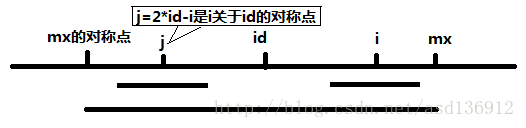


In [177]:
class Solution:
    
    # Method 2: 中心枚举
    def manacher(self, s):
        # 字符串处理，用特殊字符隔离字符串，方便处理偶数子串
        s = '#'+'#'.join(s)+'#'
        
        f = []    # 辅助列表：f[i]表示i作中心的最长回文子串的长度
        maxid = 0  # 记录对i右边影响最大的字符位置j
        maxl = 0  # 记录j影响范围的右边界
        maxd = 0  # 记录最长的回文子串长度
        
        return s
    
fun = Solution()
print('result:', fun.manacher("nn"))




result: #n#n#


## 6. 字符串的全排列


输入一个字符串，打印出该字符串中字符的所有排列。

例如输入字符串abc，则输出由字符a、b、c 所能排列出来的所有字符串

abc、acb、bac、bca、cab 和 cba。

#### 解法一、递归实现



从集合中依次选出每一个元素，作为排列的第一个元素，然后对剩余的元素进行全排列，如此递归处理，从而得到所有元素的全排列。以对字符串abc进行全排列为例，我们可以这么做：以abc为例

1. 固定a，求后面bc的排列：abc，acb，求好后，a和b交换，得到bac
2. 固定b，求后面ac的排列：bac，bca，求好后，c放到第一位置，得到cba
3. 固定c，求后面ba的排列：cba，cab。

In [196]:
def CalcAllPermutation(s):
    result = []
    if len(s)<=1: return [s]
    for i in range(len(s)):
        for j in CalcAllPermutation(s[:i]+s[i+1:]):
            result.append(s[i]+j)
    return result
        
        
print('result:', CalcAllPermutation("abcdf"))

result: ['abcdf', 'abcfd', 'abdcf', 'abdfc', 'abfcd', 'abfdc', 'acbdf', 'acbfd', 'acdbf', 'acdfb', 'acfbd', 'acfdb', 'adbcf', 'adbfc', 'adcbf', 'adcfb', 'adfbc', 'adfcb', 'afbcd', 'afbdc', 'afcbd', 'afcdb', 'afdbc', 'afdcb', 'bacdf', 'bacfd', 'badcf', 'badfc', 'bafcd', 'bafdc', 'bcadf', 'bcafd', 'bcdaf', 'bcdfa', 'bcfad', 'bcfda', 'bdacf', 'bdafc', 'bdcaf', 'bdcfa', 'bdfac', 'bdfca', 'bfacd', 'bfadc', 'bfcad', 'bfcda', 'bfdac', 'bfdca', 'cabdf', 'cabfd', 'cadbf', 'cadfb', 'cafbd', 'cafdb', 'cbadf', 'cbafd', 'cbdaf', 'cbdfa', 'cbfad', 'cbfda', 'cdabf', 'cdafb', 'cdbaf', 'cdbfa', 'cdfab', 'cdfba', 'cfabd', 'cfadb', 'cfbad', 'cfbda', 'cfdab', 'cfdba', 'dabcf', 'dabfc', 'dacbf', 'dacfb', 'dafbc', 'dafcb', 'dbacf', 'dbafc', 'dbcaf', 'dbcfa', 'dbfac', 'dbfca', 'dcabf', 'dcafb', 'dcbaf', 'dcbfa', 'dcfab', 'dcfba', 'dfabc', 'dfacb', 'dfbac', 'dfbca', 'dfcab', 'dfcba', 'fabcd', 'fabdc', 'facbd', 'facdb', 'fadbc', 'fadcb', 'fbacd', 'fbadc', 'fbcad', 'fbcda', 'fbdac', 'fbdca', 'fcabd', 'fcadb', '

#### 类似问题

1、已知字符串里的字符是互不相同的，现在任意组合，比如ab，则输出aa，ab，ba，bb，编程按照字典序输出所有的组合。

In [215]:
def function(s,result,length):
    result = []
    if cur_l == length: s
    for i in s:
        for j in function(s):
            if len(i+j) == len(s):
                result.append(i+j)
    return result
        
        
print('result:', function("ab"))

RecursionError: maximum recursion depth exceeded in comparison